# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [01:53, 1.14MB/s]                                      


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


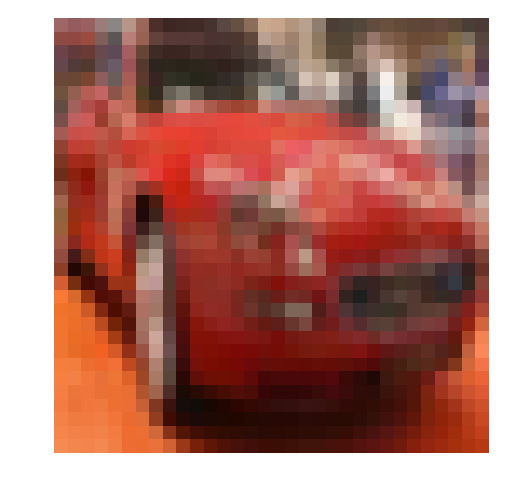

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [17]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    # Reference: https://stackoverflow.com/questions/42460217/how-to-normalize-a-4d-numpy-array
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)
    return (x - x_min)/(x_max-x_min)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [78]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    # Reference: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
    x_min = min(x)
    x_max = max(x)
    onehot_encoded = list()
    for value in x:
        number = [0 for _ in range((x_max - x_min + 1))]
        number[value] = 1
        onehot_encoded.append(number)
    return np.array(onehot_encoded)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [79]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [518]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [519]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    image_input = tf.placeholder(
        tf.float32, 
        shape=[None, *image_shape], # or: shape=[None]+list(image_shape)
        name="x")
    #print (image_input.get_shape().as_list())
    #print (image_input.op.type)
    #print (image_input.name)
    return image_input


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    label_input = tf.placeholder(
        tf.float32, 
        shape=[None, n_classes],
        name="y")
    #print (label_input.get_shape().as_list())
    #print (label_input.op.type)
    #print (label_input.name)
    return label_input


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    keep_pro_input = tf.placeholder(
        tf.float32, 
        shape=None,
        name="keep_prob")
    #print (keep_pro_input.get_shape().ndims)
    #print (keep_pro_input.op.type)
    #print (keep_pro_input.name)
    return keep_pro_input


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [520]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    ## Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor.
    weight = tf.Variable(
        tf.truncated_normal(
        [*conv_ksize, 
        (x_tensor.get_shape().as_list()[-1]), 
         conv_num_outputs]))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    ## Apply a convolution to x_tensor using weight and conv_strides.
    strides = (1, *conv_strides, 1)
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides, padding='SAME')
    ## Add bias.
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    ## Add a nonlinear activation to the convolution.
    conv_layer = tf.nn.relu(conv_layer)
    ## Apply Max Pooling using pool_ksize and pool_strides.
    pool_ksize = (1, *pool_ksize, 1)
    pool_strides = (1, *pool_strides, 1)
    conv_layer = tf.nn.max_pool(conv_layer, pool_ksize, pool_strides, padding='SAME')
    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


In [340]:
# Self-testing
x_tensor = tf.placeholder(tf.float32, [None, 32, 32, 5])
conv_num_outputs = 10
conv_ksize = (2, 2)
conv_strides = (4, 4)
pool_ksize = (2, 2)
pool_strides = (2, 2)

In [363]:
(1, *pool_ksize, 1)

(1, 2, 2, 1)

In [358]:
weight = tf.Variable(
        tf.truncated_normal(
        [*conv_ksize, 
        (x_tensor.get_shape().as_list()[-1]), 
         conv_num_outputs]))

### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [521]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    # Alternative: 
    # return tf.contrib.layers.flatten(x_tensor)
    # Reference: https://stackoverflow.com/questions/36668542/flatten-batch-in-tensorflow
    shape = x_tensor.get_shape().as_list() # a list: [None, 10, 30, 6]
    dim = np.prod(shape[1:])        # dim = prod(10,30,6) = 1800
    flat_out = tf.reshape(x_tensor, [-1, dim])   # -1 means "all"   
    return flat_out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


In [371]:
# Self testing
x_tensor = tf.placeholder(tf.float32, [None, 10, 30, 6])
print(tf.contrib.layers.flatten(x_tensor))
shape = x_tensor.get_shape().as_list() # a list: [None, 10, 30, 6]
dim = np.prod(shape[1:])        # dim = prod(10,30,6) = 1800
flat_out = tf.reshape(x_tensor, [-1, dim])
print(flat_out)
print(x_tensor)
print(x)

Tensor("Flatten_6/Reshape:0", shape=(?, 1800), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1800), dtype=float32)
Tensor("Placeholder_8:0", shape=(?, 10, 30, 6), dtype=float32)
Tensor("x_11:0", shape=(?, 32, 32, 3), dtype=float32)


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [522]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs)
    # Alternative
    #weight_out = tf.Variable(tf.random_normal([x_tensor.get_shape().as_list()[-1],num_outputs]))
    #bias_out = tf.Variable(tf.random_normal([num_outputs]))
    #tf.nn.relu(tf.add(tf.matmul(x_tensor, weight_out), bias_out))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [523]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    weight_out = tf.Variable(tf.random_normal([x_tensor.get_shape().as_list()[-1],num_outputs]))
    bias_out = tf.Variable(tf.random_normal([num_outputs]))
    return tf.add(tf.matmul(x_tensor, weight_out), bias_out)
    # Alternative:
    # tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=None)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [524]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    x_tensor = x
    conv_num_outputs = 10
    conv_ksize = (2, 2)
    conv_strides = (4, 4)
    pool_ksize = (2, 2)
    pool_strides = (2, 2)
    x_tensor = conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x_tensor = flatten(x_tensor)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    num_outputs = 10
    x_tensor = fully_conn(x_tensor, num_outputs)
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    out = output(x_tensor, num_outputs)
    
    # TODO: return output
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [525]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    #session.run = MagicMock()
    session.run(optimizer, feed_dict={
            x: feature_batch, 
            y: label_batch, 
            keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [526]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0})
    valid_acc = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss,valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [543]:
# TODO: Tune Parameters
epochs = 1000
batch_size = 512*2
keep_probability = 0.8

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [544]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     5.5950 Validation Accuracy: 0.105800
Epoch  2, CIFAR-10 Batch 1:  Loss:     4.0397 Validation Accuracy: 0.106600
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.9018 Validation Accuracy: 0.101000
Epoch  4, CIFAR-10 Batch 1:  Loss:     2.4937 Validation Accuracy: 0.114200
Epoch  5, CIFAR-10 Batch 1:  Loss:     2.4048 Validation Accuracy: 0.110800
Epoch  6, CIFAR-10 Batch 1:  Loss:     2.3766 Validation Accuracy: 0.106600
Epoch  7, CIFAR-10 Batch 1:  Loss:     2.3618 Validation Accuracy: 0.111200
Epoch  8, CIFAR-10 Batch 1:  Loss:     2.3511 Validation Accuracy: 0.115400
Epoch  9, CIFAR-10 Batch 1:  Loss:     2.3411 Validation Accuracy: 0.118000
Epoch 10, CIFAR-10 Batch 1:  Loss:     2.3288 Validation Accuracy: 0.128600
Epoch 11, CIFAR-10 Batch 1:  Loss:     2.3226 Validation Accuracy: 0.131800
Epoch 12, CIFAR-10 Batch 1:  Loss:     2.3145 Validation Accuracy: 0.145000
Epoch 13, CIFAR-10 Batch 1:  Loss:     2.3030

Epoch 214, CIFAR-10 Batch 1:  Loss:     1.6545 Validation Accuracy: 0.355200
Epoch 215, CIFAR-10 Batch 1:  Loss:     1.6550 Validation Accuracy: 0.354000
Epoch 216, CIFAR-10 Batch 1:  Loss:     1.6481 Validation Accuracy: 0.351400
Epoch 217, CIFAR-10 Batch 1:  Loss:     1.6509 Validation Accuracy: 0.356600
Epoch 218, CIFAR-10 Batch 1:  Loss:     1.6487 Validation Accuracy: 0.352200
Epoch 219, CIFAR-10 Batch 1:  Loss:     1.6511 Validation Accuracy: 0.355000
Epoch 220, CIFAR-10 Batch 1:  Loss:     1.6479 Validation Accuracy: 0.353800
Epoch 221, CIFAR-10 Batch 1:  Loss:     1.6445 Validation Accuracy: 0.355000
Epoch 222, CIFAR-10 Batch 1:  Loss:     1.6505 Validation Accuracy: 0.353800
Epoch 223, CIFAR-10 Batch 1:  Loss:     1.6434 Validation Accuracy: 0.355600
Epoch 224, CIFAR-10 Batch 1:  Loss:     1.6451 Validation Accuracy: 0.353600
Epoch 225, CIFAR-10 Batch 1:  Loss:     1.6439 Validation Accuracy: 0.356800
Epoch 226, CIFAR-10 Batch 1:  Loss:     1.6424 Validation Accuracy: 0.354800

Epoch 426, CIFAR-10 Batch 1:  Loss:     1.5378 Validation Accuracy: 0.392000
Epoch 427, CIFAR-10 Batch 1:  Loss:     1.5382 Validation Accuracy: 0.391800
Epoch 428, CIFAR-10 Batch 1:  Loss:     1.5388 Validation Accuracy: 0.392200
Epoch 429, CIFAR-10 Batch 1:  Loss:     1.5357 Validation Accuracy: 0.390200
Epoch 430, CIFAR-10 Batch 1:  Loss:     1.5362 Validation Accuracy: 0.393600
Epoch 431, CIFAR-10 Batch 1:  Loss:     1.5345 Validation Accuracy: 0.392000
Epoch 432, CIFAR-10 Batch 1:  Loss:     1.5340 Validation Accuracy: 0.390600
Epoch 433, CIFAR-10 Batch 1:  Loss:     1.5335 Validation Accuracy: 0.392600
Epoch 434, CIFAR-10 Batch 1:  Loss:     1.5351 Validation Accuracy: 0.392000
Epoch 435, CIFAR-10 Batch 1:  Loss:     1.5310 Validation Accuracy: 0.394200
Epoch 436, CIFAR-10 Batch 1:  Loss:     1.5335 Validation Accuracy: 0.392400
Epoch 437, CIFAR-10 Batch 1:  Loss:     1.5326 Validation Accuracy: 0.392000
Epoch 438, CIFAR-10 Batch 1:  Loss:     1.5308 Validation Accuracy: 0.391600

Epoch 638, CIFAR-10 Batch 1:  Loss:     1.4614 Validation Accuracy: 0.407400
Epoch 639, CIFAR-10 Batch 1:  Loss:     1.4658 Validation Accuracy: 0.406000
Epoch 640, CIFAR-10 Batch 1:  Loss:     1.4637 Validation Accuracy: 0.407600
Epoch 641, CIFAR-10 Batch 1:  Loss:     1.4628 Validation Accuracy: 0.407200
Epoch 642, CIFAR-10 Batch 1:  Loss:     1.4634 Validation Accuracy: 0.406600
Epoch 643, CIFAR-10 Batch 1:  Loss:     1.4638 Validation Accuracy: 0.405200
Epoch 644, CIFAR-10 Batch 1:  Loss:     1.4582 Validation Accuracy: 0.408800
Epoch 645, CIFAR-10 Batch 1:  Loss:     1.4594 Validation Accuracy: 0.408800
Epoch 646, CIFAR-10 Batch 1:  Loss:     1.4601 Validation Accuracy: 0.409000
Epoch 647, CIFAR-10 Batch 1:  Loss:     1.4577 Validation Accuracy: 0.405400
Epoch 648, CIFAR-10 Batch 1:  Loss:     1.4638 Validation Accuracy: 0.408200
Epoch 649, CIFAR-10 Batch 1:  Loss:     1.4584 Validation Accuracy: 0.404600
Epoch 650, CIFAR-10 Batch 1:  Loss:     1.4595 Validation Accuracy: 0.406400

Epoch 850, CIFAR-10 Batch 1:  Loss:     1.4272 Validation Accuracy: 0.408600
Epoch 851, CIFAR-10 Batch 1:  Loss:     1.4254 Validation Accuracy: 0.409200
Epoch 852, CIFAR-10 Batch 1:  Loss:     1.4242 Validation Accuracy: 0.408600
Epoch 853, CIFAR-10 Batch 1:  Loss:     1.4266 Validation Accuracy: 0.408400
Epoch 854, CIFAR-10 Batch 1:  Loss:     1.4260 Validation Accuracy: 0.408800
Epoch 855, CIFAR-10 Batch 1:  Loss:     1.4242 Validation Accuracy: 0.408800
Epoch 856, CIFAR-10 Batch 1:  Loss:     1.4275 Validation Accuracy: 0.409800
Epoch 857, CIFAR-10 Batch 1:  Loss:     1.4316 Validation Accuracy: 0.408000
Epoch 858, CIFAR-10 Batch 1:  Loss:     1.4278 Validation Accuracy: 0.406000
Epoch 859, CIFAR-10 Batch 1:  Loss:     1.4252 Validation Accuracy: 0.408000
Epoch 860, CIFAR-10 Batch 1:  Loss:     1.4245 Validation Accuracy: 0.407400
Epoch 861, CIFAR-10 Batch 1:  Loss:     1.4244 Validation Accuracy: 0.408000
Epoch 862, CIFAR-10 Batch 1:  Loss:     1.4236 Validation Accuracy: 0.409000

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.5159 Validation Accuracy: 0.088200
Epoch  1, CIFAR-10 Batch 2:  Loss:     2.4588 Validation Accuracy: 0.092200
Epoch  1, CIFAR-10 Batch 3:  Loss:     2.3943 Validation Accuracy: 0.092000
Epoch  1, CIFAR-10 Batch 4:  Loss:     2.4200 Validation Accuracy: 0.093400
Epoch  1, CIFAR-10 Batch 5:  Loss:     2.4086 Validation Accuracy: 0.093400
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.3971 Validation Accuracy: 0.094400
Epoch  2, CIFAR-10 Batch 2:  Loss:     2.4017 Validation Accuracy: 0.095400
Epoch  2, CIFAR-10 Batch 3:  Loss:     2.3556 Validation Accuracy: 0.095000
Epoch  2, CIFAR-10 Batch 4:  Loss:     2.3821 Validation Accuracy: 0.096800
Epoch  2, CIFAR-10 Batch 5:  Loss:     2.3730 Validation Accuracy: 0.096200
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.3587 Validation Accuracy: 0.095800
Epoch  3, CIFAR-10 Batch 2:  Loss:     2.3665 Validation Accuracy: 0.096400
Epoch  3, CIFAR-10 Batch 3:  Loss:     2.3240 Validation Accuracy: 0.096400


Epoch 43, CIFAR-10 Batch 5:  Loss:     1.8743 Validation Accuracy: 0.304000
Epoch 44, CIFAR-10 Batch 1:  Loss:     1.8695 Validation Accuracy: 0.313400
Epoch 44, CIFAR-10 Batch 2:  Loss:     1.8458 Validation Accuracy: 0.310800
Epoch 44, CIFAR-10 Batch 3:  Loss:     1.8213 Validation Accuracy: 0.316800
Epoch 44, CIFAR-10 Batch 4:  Loss:     1.8151 Validation Accuracy: 0.308200
Epoch 44, CIFAR-10 Batch 5:  Loss:     1.8662 Validation Accuracy: 0.305400
Epoch 45, CIFAR-10 Batch 1:  Loss:     1.8631 Validation Accuracy: 0.319200
Epoch 45, CIFAR-10 Batch 2:  Loss:     1.8373 Validation Accuracy: 0.313800
Epoch 45, CIFAR-10 Batch 3:  Loss:     1.8212 Validation Accuracy: 0.317000
Epoch 45, CIFAR-10 Batch 4:  Loss:     1.8104 Validation Accuracy: 0.306800
Epoch 45, CIFAR-10 Batch 5:  Loss:     1.8605 Validation Accuracy: 0.309000
Epoch 46, CIFAR-10 Batch 1:  Loss:     1.8645 Validation Accuracy: 0.312200
Epoch 46, CIFAR-10 Batch 2:  Loss:     1.8349 Validation Accuracy: 0.313000
Epoch 46, CI

Epoch 86, CIFAR-10 Batch 4:  Loss:     1.7234 Validation Accuracy: 0.356200
Epoch 86, CIFAR-10 Batch 5:  Loss:     1.7717 Validation Accuracy: 0.357200
Epoch 87, CIFAR-10 Batch 1:  Loss:     1.7591 Validation Accuracy: 0.354800
Epoch 87, CIFAR-10 Batch 2:  Loss:     1.7285 Validation Accuracy: 0.359400
Epoch 87, CIFAR-10 Batch 3:  Loss:     1.7125 Validation Accuracy: 0.365200
Epoch 87, CIFAR-10 Batch 4:  Loss:     1.7164 Validation Accuracy: 0.359600
Epoch 87, CIFAR-10 Batch 5:  Loss:     1.7659 Validation Accuracy: 0.359000
Epoch 88, CIFAR-10 Batch 1:  Loss:     1.7516 Validation Accuracy: 0.360000
Epoch 88, CIFAR-10 Batch 2:  Loss:     1.7310 Validation Accuracy: 0.359000
Epoch 88, CIFAR-10 Batch 3:  Loss:     1.7022 Validation Accuracy: 0.367400
Epoch 88, CIFAR-10 Batch 4:  Loss:     1.7177 Validation Accuracy: 0.360000
Epoch 88, CIFAR-10 Batch 5:  Loss:     1.7639 Validation Accuracy: 0.359400
Epoch 89, CIFAR-10 Batch 1:  Loss:     1.7504 Validation Accuracy: 0.365400
Epoch 89, CI

Epoch 129, CIFAR-10 Batch 2:  Loss:     1.6355 Validation Accuracy: 0.415600
Epoch 129, CIFAR-10 Batch 3:  Loss:     1.6108 Validation Accuracy: 0.412800
Epoch 129, CIFAR-10 Batch 4:  Loss:     1.6210 Validation Accuracy: 0.416200
Epoch 129, CIFAR-10 Batch 5:  Loss:     1.6555 Validation Accuracy: 0.409800
Epoch 130, CIFAR-10 Batch 1:  Loss:     1.6776 Validation Accuracy: 0.419600
Epoch 130, CIFAR-10 Batch 2:  Loss:     1.6343 Validation Accuracy: 0.416600
Epoch 130, CIFAR-10 Batch 3:  Loss:     1.6077 Validation Accuracy: 0.416200
Epoch 130, CIFAR-10 Batch 4:  Loss:     1.6259 Validation Accuracy: 0.416800
Epoch 130, CIFAR-10 Batch 5:  Loss:     1.6568 Validation Accuracy: 0.410800
Epoch 131, CIFAR-10 Batch 1:  Loss:     1.6707 Validation Accuracy: 0.416200
Epoch 131, CIFAR-10 Batch 2:  Loss:     1.6314 Validation Accuracy: 0.418000Epoch 171, CIFAR-10 Batch 3:  Loss:     1.5785 Validation Accuracy: 0.430000
Epoch 171, CIFAR-10 Batch 4:  Loss:     1.5845 Validation Accuracy: 0.427200


Epoch 211, CIFAR-10 Batch 4:  Loss:     1.5703 Validation Accuracy: 0.426400
Epoch 211, CIFAR-10 Batch 5:  Loss:     1.6032 Validation Accuracy: 0.433200
Epoch 212, CIFAR-10 Batch 1:  Loss:     1.6069 Validation Accuracy: 0.426800
Epoch 212, CIFAR-10 Batch 2:  Loss:     1.5823 Validation Accuracy: 0.432800
Epoch 212, CIFAR-10 Batch 3:  Loss:     1.5582 Validation Accuracy: 0.433200
Epoch 212, CIFAR-10 Batch 4:  Loss:     1.5709 Validation Accuracy: 0.427000
Epoch 212, CIFAR-10 Batch 5:  Loss:     1.5985 Validation Accuracy: 0.432200
Epoch 213, CIFAR-10 Batch 1:  Loss:     1.6083 Validation Accuracy: 0.428000
Epoch 213, CIFAR-10 Batch 2:  Loss:     1.5803 Validation Accuracy: 0.426400
Epoch 213, CIFAR-10 Batch 3:  Loss:     1.5634 Validation Accuracy: 0.433600
Epoch 213, CIFAR-10 Batch 4:  Loss:     1.5681 Validation Accuracy: 0.428600
Epoch 213, CIFAR-10 Batch 5:  Loss:     1.6017 Validation Accuracy: 0.432600
Epoch 214, CIFAR-10 Batch 1:  Loss:     1.6037 Validation Accuracy: 0.430200

Epoch 254, CIFAR-10 Batch 1:  Loss:     1.6019 Validation Accuracy: 0.429000
Epoch 254, CIFAR-10 Batch 2:  Loss:     1.5682 Validation Accuracy: 0.431800
Epoch 254, CIFAR-10 Batch 3:  Loss:     1.5561 Validation Accuracy: 0.438000
Epoch 254, CIFAR-10 Batch 4:  Loss:     1.5612 Validation Accuracy: 0.429200
Epoch 254, CIFAR-10 Batch 5:  Loss:     1.5958 Validation Accuracy: 0.435400
Epoch 255, CIFAR-10 Batch 1:  Loss:     1.6035 Validation Accuracy: 0.427600
Epoch 255, CIFAR-10 Batch 2:  Loss:     1.5701 Validation Accuracy: 0.429000
Epoch 255, CIFAR-10 Batch 3:  Loss:     1.5547 Validation Accuracy: 0.436400
Epoch 255, CIFAR-10 Batch 4:  Loss:     1.5641 Validation Accuracy: 0.427400
Epoch 255, CIFAR-10 Batch 5:  Loss:     1.5962 Validation Accuracy: 0.433600
Epoch 256, CIFAR-10 Batch 1:  Loss:     1.6033 Validation Accuracy: 0.430400
Epoch 256, CIFAR-10 Batch 2:  Loss:     1.5662 Validation Accuracy: 0.428800
Epoch 256, CIFAR-10 Batch 3:  Loss:     1.5590 Validation Accuracy: 0.433200

Epoch 296, CIFAR-10 Batch 3:  Loss:     1.5493 Validation Accuracy: 0.433400
Epoch 296, CIFAR-10 Batch 4:  Loss:     1.5626 Validation Accuracy: 0.428600
Epoch 296, CIFAR-10 Batch 5:  Loss:     1.5943 Validation Accuracy: 0.430600
Epoch 297, CIFAR-10 Batch 1:  Loss:     1.6056 Validation Accuracy: 0.434000
Epoch 297, CIFAR-10 Batch 2:  Loss:     1.5510 Validation Accuracy: 0.432600
Epoch 297, CIFAR-10 Batch 3:  Loss:     1.5538 Validation Accuracy: 0.435600
Epoch 297, CIFAR-10 Batch 4:  Loss:     1.5583 Validation Accuracy: 0.429400
Epoch 297, CIFAR-10 Batch 5:  Loss:     1.5970 Validation Accuracy: 0.429400
Epoch 298, CIFAR-10 Batch 1:  Loss:     1.6070 Validation Accuracy: 0.432800
Epoch 298, CIFAR-10 Batch 2:  Loss:     1.5571 Validation Accuracy: 0.434800
Epoch 298, CIFAR-10 Batch 3:  Loss:     1.5489 Validation Accuracy: 0.434600
Epoch 298, CIFAR-10 Batch 4:  Loss:     1.5589 Validation Accuracy: 0.432200
Epoch 298, CIFAR-10 Batch 5:  Loss:     1.5962 Validation Accuracy: 0.431200

Epoch 338, CIFAR-10 Batch 5:  Loss:     1.5912 Validation Accuracy: 0.423000
Epoch 339, CIFAR-10 Batch 1:  Loss:     1.6017 Validation Accuracy: 0.432000
Epoch 339, CIFAR-10 Batch 2:  Loss:     1.5469 Validation Accuracy: 0.429200
Epoch 339, CIFAR-10 Batch 3:  Loss:     1.5485 Validation Accuracy: 0.429200
Epoch 339, CIFAR-10 Batch 4:  Loss:     1.5556 Validation Accuracy: 0.427800
Epoch 339, CIFAR-10 Batch 5:  Loss:     1.5899 Validation Accuracy: 0.425800
Epoch 340, CIFAR-10 Batch 1:  Loss:     1.6032 Validation Accuracy: 0.430600
Epoch 340, CIFAR-10 Batch 2:  Loss:     1.5493 Validation Accuracy: 0.427800
Epoch 340, CIFAR-10 Batch 3:  Loss:     1.5507 Validation Accuracy: 0.427800
Epoch 340, CIFAR-10 Batch 4:  Loss:     1.5605 Validation Accuracy: 0.426600
Epoch 340, CIFAR-10 Batch 5:  Loss:     1.5867 Validation Accuracy: 0.426000
Epoch 341, CIFAR-10 Batch 1:  Loss:     1.6059 Validation Accuracy: 0.431800
Epoch 341, CIFAR-10 Batch 2:  Loss:     1.5501 Validation Accuracy: 0.427800

Epoch 381, CIFAR-10 Batch 2:  Loss:     1.5448 Validation Accuracy: 0.426400
Epoch 381, CIFAR-10 Batch 3:  Loss:     1.5558 Validation Accuracy: 0.425000
Epoch 381, CIFAR-10 Batch 4:  Loss:     1.5500 Validation Accuracy: 0.423400
Epoch 381, CIFAR-10 Batch 5:  Loss:     1.5897 Validation Accuracy: 0.424400
Epoch 382, CIFAR-10 Batch 1:  Loss:     1.6104 Validation Accuracy: 0.426800
Epoch 382, CIFAR-10 Batch 2:  Loss:     1.5430 Validation Accuracy: 0.424400
Epoch 382, CIFAR-10 Batch 3:  Loss:     1.5560 Validation Accuracy: 0.429600
Epoch 382, CIFAR-10 Batch 4:  Loss:     1.5555 Validation Accuracy: 0.421400
Epoch 382, CIFAR-10 Batch 5:  Loss:     1.5926 Validation Accuracy: 0.422800
Epoch 383, CIFAR-10 Batch 1:  Loss:     1.6074 Validation Accuracy: 0.428400
Epoch 383, CIFAR-10 Batch 2:  Loss:     1.5437 Validation Accuracy: 0.425400
Epoch 383, CIFAR-10 Batch 3:  Loss:     1.5578 Validation Accuracy: 0.428800
Epoch 383, CIFAR-10 Batch 4:  Loss:     1.5533 Validation Accuracy: 0.423600

Epoch 423, CIFAR-10 Batch 4:  Loss:     1.5505 Validation Accuracy: 0.428000
Epoch 423, CIFAR-10 Batch 5:  Loss:     1.5837 Validation Accuracy: 0.428200
Epoch 424, CIFAR-10 Batch 1:  Loss:     1.6166 Validation Accuracy: 0.428000
Epoch 424, CIFAR-10 Batch 2:  Loss:     1.5462 Validation Accuracy: 0.432200
Epoch 424, CIFAR-10 Batch 3:  Loss:     1.5607 Validation Accuracy: 0.428600
Epoch 424, CIFAR-10 Batch 4:  Loss:     1.5504 Validation Accuracy: 0.425200
Epoch 424, CIFAR-10 Batch 5:  Loss:     1.5829 Validation Accuracy: 0.428800
Epoch 425, CIFAR-10 Batch 1:  Loss:     1.6140 Validation Accuracy: 0.429000
Epoch 425, CIFAR-10 Batch 2:  Loss:     1.5493 Validation Accuracy: 0.431000
Epoch 425, CIFAR-10 Batch 3:  Loss:     1.5572 Validation Accuracy: 0.429600
Epoch 425, CIFAR-10 Batch 4:  Loss:     1.5488 Validation Accuracy: 0.428200
Epoch 425, CIFAR-10 Batch 5:  Loss:     1.5859 Validation Accuracy: 0.428800
Epoch 426, CIFAR-10 Batch 1:  Loss:     1.6105 Validation Accuracy: 0.427400

Epoch 466, CIFAR-10 Batch 1:  Loss:     1.6142 Validation Accuracy: 0.425000
Epoch 466, CIFAR-10 Batch 2:  Loss:     1.5622 Validation Accuracy: 0.427400
Epoch 466, CIFAR-10 Batch 3:  Loss:     1.5560 Validation Accuracy: 0.430400
Epoch 466, CIFAR-10 Batch 4:  Loss:     1.5438 Validation Accuracy: 0.428000
Epoch 466, CIFAR-10 Batch 5:  Loss:     1.5803 Validation Accuracy: 0.432000
Epoch 467, CIFAR-10 Batch 1:  Loss:     1.6122 Validation Accuracy: 0.426600
Epoch 467, CIFAR-10 Batch 2:  Loss:     1.5630 Validation Accuracy: 0.430600
Epoch 467, CIFAR-10 Batch 3:  Loss:     1.5604 Validation Accuracy: 0.427800
Epoch 467, CIFAR-10 Batch 4:  Loss:     1.5406 Validation Accuracy: 0.429000
Epoch 467, CIFAR-10 Batch 5:  Loss:     1.5825 Validation Accuracy: 0.428600
Epoch 468, CIFAR-10 Batch 1:  Loss:     1.6149 Validation Accuracy: 0.427400
Epoch 468, CIFAR-10 Batch 2:  Loss:     1.5590 Validation Accuracy: 0.430200
Epoch 468, CIFAR-10 Batch 3:  Loss:     1.5561 Validation Accuracy: 0.430800

Epoch 508, CIFAR-10 Batch 3:  Loss:     1.5594 Validation Accuracy: 0.427000
Epoch 508, CIFAR-10 Batch 4:  Loss:     1.5286 Validation Accuracy: 0.426400
Epoch 508, CIFAR-10 Batch 5:  Loss:     1.5773 Validation Accuracy: 0.431600
Epoch 509, CIFAR-10 Batch 1:  Loss:     1.6020 Validation Accuracy: 0.424600
Epoch 509, CIFAR-10 Batch 2:  Loss:     1.5582 Validation Accuracy: 0.430000
Epoch 509, CIFAR-10 Batch 3:  Loss:     1.5572 Validation Accuracy: 0.429800
Epoch 509, CIFAR-10 Batch 4:  Loss:     1.5334 Validation Accuracy: 0.424200
Epoch 509, CIFAR-10 Batch 5:  Loss:     1.5801 Validation Accuracy: 0.431800
Epoch 510, CIFAR-10 Batch 1:  Loss:     1.6002 Validation Accuracy: 0.420400
Epoch 510, CIFAR-10 Batch 2:  Loss:     1.5615 Validation Accuracy: 0.429600
Epoch 510, CIFAR-10 Batch 3:  Loss:     1.5563 Validation Accuracy: 0.430800
Epoch 510, CIFAR-10 Batch 4:  Loss:     1.5321 Validation Accuracy: 0.426400
Epoch 510, CIFAR-10 Batch 5:  Loss:     1.5803 Validation Accuracy: 0.431200

Epoch 550, CIFAR-10 Batch 5:  Loss:     1.5722 Validation Accuracy: 0.434000
Epoch 551, CIFAR-10 Batch 1:  Loss:     1.5845 Validation Accuracy: 0.429000
Epoch 551, CIFAR-10 Batch 2:  Loss:     1.5482 Validation Accuracy: 0.439400
Epoch 551, CIFAR-10 Batch 3:  Loss:     1.5467 Validation Accuracy: 0.435600
Epoch 551, CIFAR-10 Batch 4:  Loss:     1.5182 Validation Accuracy: 0.426000
Epoch 551, CIFAR-10 Batch 5:  Loss:     1.5733 Validation Accuracy: 0.432600
Epoch 552, CIFAR-10 Batch 1:  Loss:     1.5864 Validation Accuracy: 0.428200
Epoch 552, CIFAR-10 Batch 2:  Loss:     1.5491 Validation Accuracy: 0.432200
Epoch 552, CIFAR-10 Batch 3:  Loss:     1.5447 Validation Accuracy: 0.433200
Epoch 552, CIFAR-10 Batch 4:  Loss:     1.5188 Validation Accuracy: 0.427400
Epoch 552, CIFAR-10 Batch 5:  Loss:     1.5690 Validation Accuracy: 0.429800
Epoch 553, CIFAR-10 Batch 1:  Loss:     1.5867 Validation Accuracy: 0.430800
Epoch 553, CIFAR-10 Batch 2:  Loss:     1.5532 Validation Accuracy: 0.434200

Epoch 593, CIFAR-10 Batch 2:  Loss:     1.5434 Validation Accuracy: 0.437400
Epoch 593, CIFAR-10 Batch 3:  Loss:     1.5366 Validation Accuracy: 0.436600
Epoch 593, CIFAR-10 Batch 4:  Loss:     1.5137 Validation Accuracy: 0.433000
Epoch 593, CIFAR-10 Batch 5:  Loss:     1.5637 Validation Accuracy: 0.435000
Epoch 594, CIFAR-10 Batch 1:  Loss:     1.5805 Validation Accuracy: 0.431400
Epoch 594, CIFAR-10 Batch 2:  Loss:     1.5390 Validation Accuracy: 0.437800
Epoch 594, CIFAR-10 Batch 3:  Loss:     1.5389 Validation Accuracy: 0.434800
Epoch 594, CIFAR-10 Batch 4:  Loss:     1.5112 Validation Accuracy: 0.434000
Epoch 594, CIFAR-10 Batch 5:  Loss:     1.5632 Validation Accuracy: 0.433600
Epoch 595, CIFAR-10 Batch 1:  Loss:     1.5796 Validation Accuracy: 0.432400
Epoch 595, CIFAR-10 Batch 2:  Loss:     1.5458 Validation Accuracy: 0.436400
Epoch 595, CIFAR-10 Batch 3:  Loss:     1.5361 Validation Accuracy: 0.436000
Epoch 595, CIFAR-10 Batch 4:  Loss:     1.5120 Validation Accuracy: 0.432400

Epoch 635, CIFAR-10 Batch 4:  Loss:     1.5102 Validation Accuracy: 0.430000
Epoch 635, CIFAR-10 Batch 5:  Loss:     1.5578 Validation Accuracy: 0.434800
Epoch 636, CIFAR-10 Batch 1:  Loss:     1.5828 Validation Accuracy: 0.432000
Epoch 636, CIFAR-10 Batch 2:  Loss:     1.5425 Validation Accuracy: 0.435600
Epoch 636, CIFAR-10 Batch 3:  Loss:     1.5269 Validation Accuracy: 0.434000
Epoch 636, CIFAR-10 Batch 4:  Loss:     1.5116 Validation Accuracy: 0.435000
Epoch 636, CIFAR-10 Batch 5:  Loss:     1.5577 Validation Accuracy: 0.433800
Epoch 637, CIFAR-10 Batch 1:  Loss:     1.5807 Validation Accuracy: 0.434400
Epoch 637, CIFAR-10 Batch 2:  Loss:     1.5383 Validation Accuracy: 0.435000
Epoch 637, CIFAR-10 Batch 3:  Loss:     1.5301 Validation Accuracy: 0.433600
Epoch 637, CIFAR-10 Batch 4:  Loss:     1.5082 Validation Accuracy: 0.436600
Epoch 637, CIFAR-10 Batch 5:  Loss:     1.5607 Validation Accuracy: 0.432000
Epoch 638, CIFAR-10 Batch 1:  Loss:     1.5812 Validation Accuracy: 0.434000

Epoch 678, CIFAR-10 Batch 1:  Loss:     1.5760 Validation Accuracy: 0.432600
Epoch 678, CIFAR-10 Batch 2:  Loss:     1.5385 Validation Accuracy: 0.433800
Epoch 678, CIFAR-10 Batch 3:  Loss:     1.5191 Validation Accuracy: 0.437400
Epoch 678, CIFAR-10 Batch 4:  Loss:     1.5022 Validation Accuracy: 0.434200
Epoch 678, CIFAR-10 Batch 5:  Loss:     1.5506 Validation Accuracy: 0.429400
Epoch 679, CIFAR-10 Batch 1:  Loss:     1.5763 Validation Accuracy: 0.432800
Epoch 679, CIFAR-10 Batch 2:  Loss:     1.5403 Validation Accuracy: 0.434200
Epoch 679, CIFAR-10 Batch 3:  Loss:     1.5222 Validation Accuracy: 0.437800
Epoch 679, CIFAR-10 Batch 4:  Loss:     1.5027 Validation Accuracy: 0.435200
Epoch 679, CIFAR-10 Batch 5:  Loss:     1.5543 Validation Accuracy: 0.430800
Epoch 680, CIFAR-10 Batch 1:  Loss:     1.5794 Validation Accuracy: 0.429400
Epoch 680, CIFAR-10 Batch 2:  Loss:     1.5409 Validation Accuracy: 0.432200
Epoch 680, CIFAR-10 Batch 3:  Loss:     1.5196 Validation Accuracy: 0.434400

Epoch 720, CIFAR-10 Batch 3:  Loss:     1.5194 Validation Accuracy: 0.431600
Epoch 720, CIFAR-10 Batch 4:  Loss:     1.4976 Validation Accuracy: 0.432600
Epoch 720, CIFAR-10 Batch 5:  Loss:     1.5498 Validation Accuracy: 0.423400
Epoch 721, CIFAR-10 Batch 1:  Loss:     1.5750 Validation Accuracy: 0.429400
Epoch 721, CIFAR-10 Batch 2:  Loss:     1.5356 Validation Accuracy: 0.431600
Epoch 721, CIFAR-10 Batch 3:  Loss:     1.5194 Validation Accuracy: 0.434200
Epoch 721, CIFAR-10 Batch 4:  Loss:     1.5009 Validation Accuracy: 0.428600
Epoch 721, CIFAR-10 Batch 5:  Loss:     1.5473 Validation Accuracy: 0.427200
Epoch 722, CIFAR-10 Batch 1:  Loss:     1.5800 Validation Accuracy: 0.430400
Epoch 722, CIFAR-10 Batch 2:  Loss:     1.5352 Validation Accuracy: 0.431600
Epoch 722, CIFAR-10 Batch 3:  Loss:     1.5211 Validation Accuracy: 0.432400
Epoch 722, CIFAR-10 Batch 4:  Loss:     1.5018 Validation Accuracy: 0.430000
Epoch 722, CIFAR-10 Batch 5:  Loss:     1.5498 Validation Accuracy: 0.425800

Epoch 762, CIFAR-10 Batch 5:  Loss:     1.5422 Validation Accuracy: 0.430400
Epoch 763, CIFAR-10 Batch 1:  Loss:     1.5741 Validation Accuracy: 0.433000
Epoch 763, CIFAR-10 Batch 2:  Loss:     1.5388 Validation Accuracy: 0.433000
Epoch 763, CIFAR-10 Batch 3:  Loss:     1.5109 Validation Accuracy: 0.432600
Epoch 763, CIFAR-10 Batch 4:  Loss:     1.5041 Validation Accuracy: 0.430000
Epoch 763, CIFAR-10 Batch 5:  Loss:     1.5445 Validation Accuracy: 0.432000
Epoch 764, CIFAR-10 Batch 1:  Loss:     1.5762 Validation Accuracy: 0.431000
Epoch 764, CIFAR-10 Batch 2:  Loss:     1.5353 Validation Accuracy: 0.431800
Epoch 764, CIFAR-10 Batch 3:  Loss:     1.5102 Validation Accuracy: 0.433400
Epoch 764, CIFAR-10 Batch 4:  Loss:     1.5035 Validation Accuracy: 0.428600
Epoch 764, CIFAR-10 Batch 5:  Loss:     1.5444 Validation Accuracy: 0.430800
Epoch 765, CIFAR-10 Batch 1:  Loss:     1.5741 Validation Accuracy: 0.432600
Epoch 765, CIFAR-10 Batch 2:  Loss:     1.5348 Validation Accuracy: 0.434000

Epoch 805, CIFAR-10 Batch 2:  Loss:     1.5348 Validation Accuracy: 0.431400
Epoch 805, CIFAR-10 Batch 3:  Loss:     1.5130 Validation Accuracy: 0.431800
Epoch 805, CIFAR-10 Batch 4:  Loss:     1.5037 Validation Accuracy: 0.431600
Epoch 805, CIFAR-10 Batch 5:  Loss:     1.5365 Validation Accuracy: 0.432400
Epoch 806, CIFAR-10 Batch 1:  Loss:     1.5769 Validation Accuracy: 0.431400
Epoch 806, CIFAR-10 Batch 2:  Loss:     1.5365 Validation Accuracy: 0.432000
Epoch 806, CIFAR-10 Batch 3:  Loss:     1.5114 Validation Accuracy: 0.431800
Epoch 806, CIFAR-10 Batch 4:  Loss:     1.5012 Validation Accuracy: 0.433200
Epoch 806, CIFAR-10 Batch 5:  Loss:     1.5409 Validation Accuracy: 0.430200
Epoch 807, CIFAR-10 Batch 1:  Loss:     1.5727 Validation Accuracy: 0.432800
Epoch 807, CIFAR-10 Batch 2:  Loss:     1.5327 Validation Accuracy: 0.435800
Epoch 807, CIFAR-10 Batch 3:  Loss:     1.5119 Validation Accuracy: 0.432600
Epoch 807, CIFAR-10 Batch 4:  Loss:     1.5043 Validation Accuracy: 0.436800

Epoch 847, CIFAR-10 Batch 4:  Loss:     1.5039 Validation Accuracy: 0.436800
Epoch 847, CIFAR-10 Batch 5:  Loss:     1.5391 Validation Accuracy: 0.432200
Epoch 848, CIFAR-10 Batch 1:  Loss:     1.5743 Validation Accuracy: 0.434000
Epoch 848, CIFAR-10 Batch 2:  Loss:     1.5276 Validation Accuracy: 0.441600
Epoch 848, CIFAR-10 Batch 3:  Loss:     1.5110 Validation Accuracy: 0.436000
Epoch 848, CIFAR-10 Batch 4:  Loss:     1.5016 Validation Accuracy: 0.438800
Epoch 848, CIFAR-10 Batch 5:  Loss:     1.5390 Validation Accuracy: 0.436800
Epoch 849, CIFAR-10 Batch 1:  Loss:     1.5712 Validation Accuracy: 0.434400
Epoch 849, CIFAR-10 Batch 2:  Loss:     1.5308 Validation Accuracy: 0.439400
Epoch 849, CIFAR-10 Batch 3:  Loss:     1.5110 Validation Accuracy: 0.440000
Epoch 849, CIFAR-10 Batch 4:  Loss:     1.5044 Validation Accuracy: 0.438200
Epoch 849, CIFAR-10 Batch 5:  Loss:     1.5362 Validation Accuracy: 0.437800
Epoch 850, CIFAR-10 Batch 1:  Loss:     1.5746 Validation Accuracy: 0.429400

Epoch 890, CIFAR-10 Batch 1:  Loss:     1.5708 Validation Accuracy: 0.433800
Epoch 890, CIFAR-10 Batch 2:  Loss:     1.5306 Validation Accuracy: 0.437200
Epoch 890, CIFAR-10 Batch 3:  Loss:     1.5072 Validation Accuracy: 0.436000
Epoch 890, CIFAR-10 Batch 4:  Loss:     1.5065 Validation Accuracy: 0.434800
Epoch 890, CIFAR-10 Batch 5:  Loss:     1.5381 Validation Accuracy: 0.433800
Epoch 891, CIFAR-10 Batch 1:  Loss:     1.5731 Validation Accuracy: 0.433800
Epoch 891, CIFAR-10 Batch 2:  Loss:     1.5280 Validation Accuracy: 0.439400
Epoch 891, CIFAR-10 Batch 3:  Loss:     1.5097 Validation Accuracy: 0.437600
Epoch 891, CIFAR-10 Batch 4:  Loss:     1.5026 Validation Accuracy: 0.439800
Epoch 891, CIFAR-10 Batch 5:  Loss:     1.5417 Validation Accuracy: 0.434800
Epoch 892, CIFAR-10 Batch 1:  Loss:     1.5735 Validation Accuracy: 0.433600
Epoch 892, CIFAR-10 Batch 2:  Loss:     1.5281 Validation Accuracy: 0.436400
Epoch 892, CIFAR-10 Batch 3:  Loss:     1.5104 Validation Accuracy: 0.435800

Epoch 932, CIFAR-10 Batch 3:  Loss:     1.5037 Validation Accuracy: 0.436400
Epoch 932, CIFAR-10 Batch 4:  Loss:     1.5096 Validation Accuracy: 0.437600
Epoch 932, CIFAR-10 Batch 5:  Loss:     1.5394 Validation Accuracy: 0.432400
Epoch 933, CIFAR-10 Batch 1:  Loss:     1.5707 Validation Accuracy: 0.436000
Epoch 933, CIFAR-10 Batch 2:  Loss:     1.5322 Validation Accuracy: 0.438600
Epoch 933, CIFAR-10 Batch 3:  Loss:     1.5077 Validation Accuracy: 0.436400
Epoch 933, CIFAR-10 Batch 4:  Loss:     1.5106 Validation Accuracy: 0.432200
Epoch 933, CIFAR-10 Batch 5:  Loss:     1.5403 Validation Accuracy: 0.429800
Epoch 934, CIFAR-10 Batch 1:  Loss:     1.5712 Validation Accuracy: 0.439400
Epoch 934, CIFAR-10 Batch 2:  Loss:     1.5235 Validation Accuracy: 0.437600
Epoch 934, CIFAR-10 Batch 3:  Loss:     1.5091 Validation Accuracy: 0.436600
Epoch 934, CIFAR-10 Batch 4:  Loss:     1.5094 Validation Accuracy: 0.436000
Epoch 934, CIFAR-10 Batch 5:  Loss:     1.5394 Validation Accuracy: 0.429000

Epoch 974, CIFAR-10 Batch 5:  Loss:     1.5426 Validation Accuracy: 0.435600
Epoch 975, CIFAR-10 Batch 1:  Loss:     1.5651 Validation Accuracy: 0.432400
Epoch 975, CIFAR-10 Batch 2:  Loss:     1.5245 Validation Accuracy: 0.438200
Epoch 975, CIFAR-10 Batch 3:  Loss:     1.5057 Validation Accuracy: 0.439600
Epoch 975, CIFAR-10 Batch 4:  Loss:     1.5102 Validation Accuracy: 0.435000
Epoch 975, CIFAR-10 Batch 5:  Loss:     1.5442 Validation Accuracy: 0.426400
Epoch 976, CIFAR-10 Batch 1:  Loss:     1.5687 Validation Accuracy: 0.434400
Epoch 976, CIFAR-10 Batch 2:  Loss:     1.5278 Validation Accuracy: 0.438400
Epoch 976, CIFAR-10 Batch 3:  Loss:     1.5030 Validation Accuracy: 0.437200
Epoch 976, CIFAR-10 Batch 4:  Loss:     1.5126 Validation Accuracy: 0.434800
Epoch 976, CIFAR-10 Batch 5:  Loss:     1.5420 Validation Accuracy: 0.436000
Epoch 977, CIFAR-10 Batch 1:  Loss:     1.5703 Validation Accuracy: 0.432400
Epoch 977, CIFAR-10 Batch 2:  Loss:     1.5253 Validation Accuracy: 0.432800

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.44028662420382164



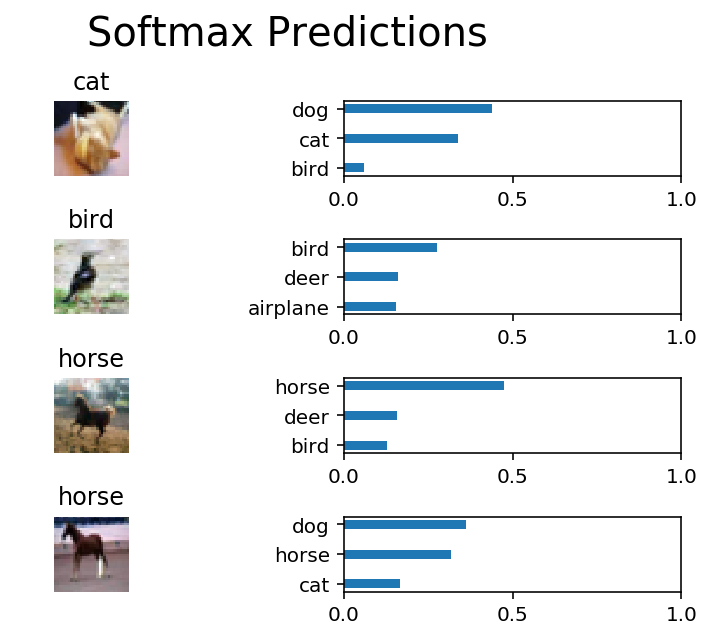

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.